# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import datetime
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name


#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#cities = [citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name for lat_lng in lat_lngs if citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name not in cities]

# Print the city count to confirm sufficient count
print(f"There are {len(cities)} unique cities.")

There are 634 unique cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
url = 'https://api.openweathermap.org/data/2.5/weather'
units = "metric"
temp = []
lat = []
lon = []
humidity_percent = []
cloudiness_percent = []
wind_speed = []
city_list = []
request_num = [x+1 for x in range(len(cities))]


for city in cities: 
    record = cities.index(city) + 1
    #set_num = 
    if record % 20 == 0: 
        #add a one second interval between queries to stay within API query limits 
        time.sleep(1)
        
        weather_response = requests.get(url, params={'appid': weather_api_key,'q': city,'units': units})
        response_json = weather_response.json()
        record = cities.index(city) + 1

        try: 
            city_list.append(response_json['name'])
            temp.append(response_json['main']['temp_max'])
            lat.append(response_json['coord']['lat'])
            lon.append(response_json['coord']['lon'])
            humidity_percent.append(response_json['main']['humidity'])
            cloudiness_percent.append(response_json['clouds']['all'])
            wind_speed.append(response_json['wind']['speed'])
            print(f"Processing Record {record} of Set 1 | {city}")

        except: 
            print(f"City not found. Skipping...")
            
        
    else:
        weather_response = requests.get(url, params={'appid': weather_api_key,'q': city, 'units': units})
        response_json = weather_response.json()
        record = cities.index(city) + 1

        try: 
            city_list.append(response_json['name'])
            temp.append(response_json['main']['temp_max'])
            lat.append(response_json['coord']['lat'])
            lon.append(response_json['coord']['lon'])
            humidity_percent.append(response_json['main']['humidity'])
            cloudiness_percent.append(response_json['clouds']['all'])
            wind_speed.append(response_json['wind']['speed'])
            print(f"Processing Record {record} of Set 1 | {city}")

        except: 
            print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | gwanda
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | itacoatiara
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | abha
Processing Record 11 of Set 1 | drovyanaya
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | vangaindrano
Processing Record 18 of Set 1 | bo rai
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bardiyah
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | briceno
Processing Record 23 of Set 1 | cabo san lucas
City not found. Skipping...
Processing 

Processing Record 204 of Set 1 | fort nelson
Processing Record 205 of Set 1 | mopipi
Processing Record 206 of Set 1 | bizhbulyak
Processing Record 207 of Set 1 | pleasanton
Processing Record 208 of Set 1 | wukari
Processing Record 209 of Set 1 | hermanus
Processing Record 210 of Set 1 | castro
Processing Record 211 of Set 1 | khor
Processing Record 212 of Set 1 | flinders
Processing Record 213 of Set 1 | shelburne
Processing Record 214 of Set 1 | sinnamary
Processing Record 215 of Set 1 | pozoblanco
Processing Record 216 of Set 1 | campo grande
Processing Record 217 of Set 1 | coventry
Processing Record 218 of Set 1 | tomatlan
City not found. Skipping...
Processing Record 220 of Set 1 | kavieng
Processing Record 221 of Set 1 | genhe
Processing Record 222 of Set 1 | awjilah
Processing Record 223 of Set 1 | kuryk
Processing Record 224 of Set 1 | peniche
Processing Record 225 of Set 1 | karratha
Processing Record 226 of Set 1 | kavaratti
Processing Record 227 of Set 1 | borogontsy
Process

Processing Record 406 of Set 1 | morehead
Processing Record 407 of Set 1 | tucuman
Processing Record 408 of Set 1 | albanel
Processing Record 409 of Set 1 | tura
Processing Record 410 of Set 1 | havelock
Processing Record 411 of Set 1 | liberia
Processing Record 412 of Set 1 | yumen
Processing Record 413 of Set 1 | mujiayingzi
Processing Record 414 of Set 1 | las cruces
Processing Record 415 of Set 1 | pandan
Processing Record 416 of Set 1 | mirnyy
Processing Record 417 of Set 1 | saint-agapit
Processing Record 418 of Set 1 | haines junction
Processing Record 419 of Set 1 | mazagao
City not found. Skipping...
Processing Record 421 of Set 1 | burnie
Processing Record 422 of Set 1 | okhotsk
Processing Record 423 of Set 1 | severo-kurilsk
Processing Record 424 of Set 1 | dabhol
Processing Record 425 of Set 1 | isla del bosque
Processing Record 426 of Set 1 | betare oya
Processing Record 427 of Set 1 | chokurdakh
Processing Record 428 of Set 1 | umm lajj
Processing Record 429 of Set 1 | fo

Processing Record 606 of Set 1 | port lincoln
Processing Record 607 of Set 1 | tromso
Processing Record 608 of Set 1 | honiara
Processing Record 609 of Set 1 | ramhormoz
Processing Record 610 of Set 1 | vilyuysk
Processing Record 611 of Set 1 | abasolo
Processing Record 612 of Set 1 | jaru
City not found. Skipping...
Processing Record 614 of Set 1 | benalla
Processing Record 615 of Set 1 | talcahuano
Processing Record 616 of Set 1 | oneonta
City not found. Skipping...
Processing Record 618 of Set 1 | belle fourche
Processing Record 619 of Set 1 | bay roberts
Processing Record 620 of Set 1 | tamworth
Processing Record 621 of Set 1 | meadow lake
Processing Record 622 of Set 1 | farafenni
Processing Record 623 of Set 1 | eyl
Processing Record 624 of Set 1 | alyangula
City not found. Skipping...
City not found. Skipping...
Processing Record 627 of Set 1 | tucupita
Processing Record 628 of Set 1 | valparaiso
Processing Record 629 of Set 1 | terney
Processing Record 630 of Set 1 | mincivan
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data = pd.DataFrame({'City': city_list,'Temperature_Max': temp,'Latitude': lat, 'Longitude': lon,
                          'Humidity %': humidity_percent,'Cloudiness %':cloudiness_percent,
                         'Wind Speed': wind_speed})
city_data.to_csv(output_data_file, index = False, header = True)

In [9]:
city_data.head()

,City,Temperature_Max,Latitude,Longitude,Humidity %,Cloudiness %,Wind Speed
0,Ushuaia,8.0,-54.80,-68.30,81,75,9.30
1,Rikitea,25.9,-23.12,-134.97,75,100,4.06
2,Gwanda,18.1,-20.93,29.00,77,90,1.10
3,Dikson,-12.6,73.51,80.55,92,0,3.74
4,Itacoatiara,23.0,-3.14,-58.44,100,71,1.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
#setting today's date 
d= datetime.today().strftime('%m-%d-%y')

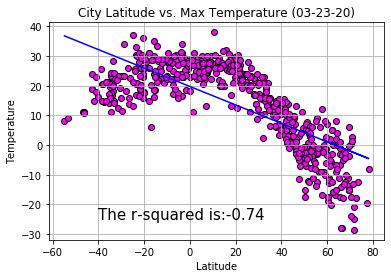

The r-squared is:-0.7387344661505001, thus signifiyng there is a strong correlation between Latitude & Temperature. The cities around the Equator (-20 - 20 Latitude), have the highest temperatures


In [11]:
latitude = [lat for lat in city_data['Latitude']]
temp = [temp for temp in city_data['Temperature_Max']]

plt.scatter(latitude, temp, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title(f"City Latitude vs. Max Temperature ({d})")
plt.grid()

latitude = np.array(latitude)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temp)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "b-")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-40,-25), fontsize=15)

plt.savefig("../output_data/Fig1.png")
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a strong correlation between Latitude & Temperature. The cities around the Equator (-20 - 20 Latitude), have the highest temperatures")

#### Latitude vs. Humidity Plot

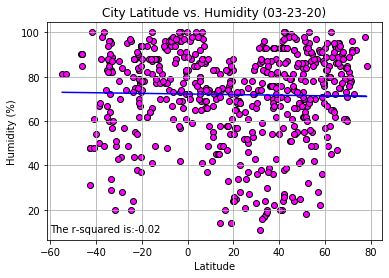

The r-squared is:-0.022160571249729564, thus signifiyng there is a not a strong correlation between Latitude & Humidity


In [12]:
humidity = [humidity for humidity in city_data['Humidity %']]

plt.scatter(latitude, humidity, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({d})")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "blue")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-60,10), fontsize=10)

plt.savefig("../output_data/Fig2.png")
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Humidity")

#### Latitude vs. Cloudiness Plot

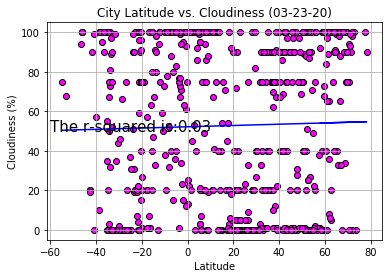

The r-squared is:0.026403587477810943, thus signifiyng there is a not a strong correlation between Latitude & Cloudiness


In [13]:
cloudiness = [cloudiness for cloudiness in city_data['Cloudiness %']]

plt.scatter(latitude, cloudiness, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({d})")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "blue")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-60,50), fontsize=15)

plt.savefig("../output_data/Fig3.png")
plt.show()

print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Cloudiness")

#### Latitude vs. Wind Speed Plot

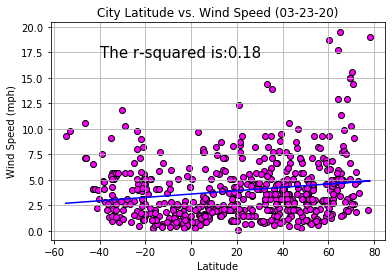

The r-squared is:0.18229138636304387, thus signifiyng there is a not a strong correlation between Latitude & Wind Speeed. Most cities wind speed is below 5mph.


In [14]:
wind = [wind for wind in city_data['Wind Speed']]

plt.scatter(latitude, wind, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({d})")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "blue")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-40,17), fontsize=15)

plt.savefig("../output_data/Fig4.png")
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Wind Speeed. Most cities wind speed is below 5mph.")

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
#see above

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = city_data.loc[city_data['Latitude']>=0]
northernHemisphere

southernHemisphere = city_data.loc[city_data['Latitude']<0]
southernHemisphere

,City,Temperature_Max,Latitude,Longitude,Humidity %,Cloudiness %,Wind Speed
0,Ushuaia,8.00,-54.80,-68.30,81,75,9.30
1,Rikitea,25.90,-23.12,-134.97,75,100,4.06
2,Gwanda,18.10,-20.93,29.00,77,90,1.10
4,Itacoatiara,23.00,-3.14,-58.44,100,71,1.04
5,New Norfolk,18.89,-42.78,147.06,48,20,4.10
...,...,...,...,...,...,...,...
557,Jaru,23.00,-10.44,-62.47,94,73,0.86
558,Benalla,21.11,-36.55,145.98,49,100,2.60
559,Talcahuano,15.00,-36.72,-73.12,100,90,2.10
567,Alyangula,29.00,-13.85,136.42,79,90,4.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8950755114897433


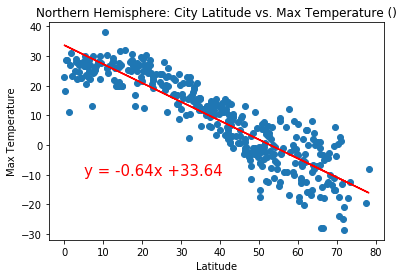

The r-squared is:-0.8950755114897433, thus signifiyng there is a strong correlation between Latitude & Temperature. The cities around the Equator (0 to 20 Latitude), have the highest temperatures. The temperature drops as the latitude increasing moving towards the North Pole.


In [17]:
latitudeNorthern = [lat for lat in northernHemisphere['Latitude']]
tempNorthern = [temp for temp in northernHemisphere['Temperature_Max']]

plt.scatter(latitudeNorthern, tempNorthern)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature ()")

latitudeNorthern = np.array(latitudeNorthern)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, tempNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(5,-10), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a strong correlation between Latitude & Temperature. The cities around the Equator (0 to 20 Latitude), have the highest temperatures. The temperature drops as the latitude increasing moving towards the North Pole.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5141601882038902


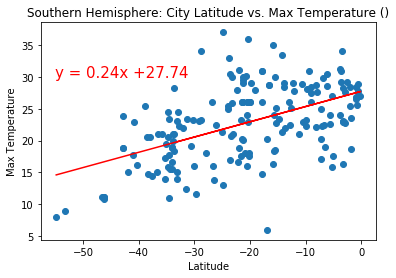

The r-squared is:0.5141601882038902, thus signifiyng there is a strong correlation between Latitude & Temperature. The cities around the Equator (0 to -10 Latitude), have the highest temperatures. The temperature drops as the latitude decreases moving towards the South Pole.


In [18]:
latitudeSouthern = [lat for lat in southernHemisphere['Latitude']]
tempSouthern = [temp for temp in southernHemisphere['Temperature_Max']]

plt.scatter(latitudeSouthern, tempSouthern)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature ()")

latitudeSouthern = np.array(latitudeSouthern)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, tempSouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-55,30), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a strong correlation between Latitude & Temperature. The cities around the Equator (0 to -10 Latitude), have the highest temperatures. The temperature drops as the latitude decreases moving towards the South Pole.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15637550061775848


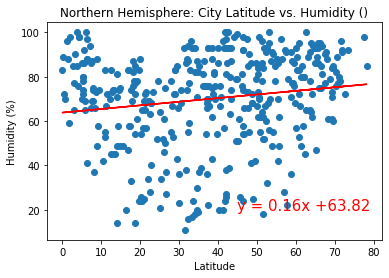

The r-squared is:0.15637550061775848, thus signifiyng there is a not a strong correlation between Latitude & Humidity


In [19]:
humidityNorthern = [humidity for humidity in northernHemisphere['Humidity %']]

plt.scatter(latitudeNorthern, humidityNorthern)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: City Latitude vs. Humidity ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, humidityNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(45,20), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22685728314397083


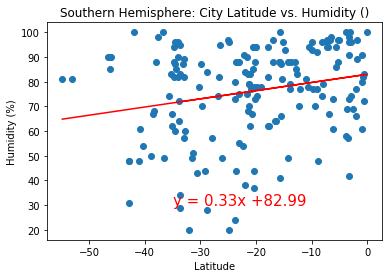

The r-squared is:0.22685728314397083, thus signifiyng there is a not a strong correlation between Latitude & Humidity


In [20]:
humiditySouthern = [humidity for humidity in southernHemisphere['Humidity %']]

plt.scatter(latitudeSouthern, humiditySouthern)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: City Latitude vs. Humidity ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, humiditySouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-35,30), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.200102723173542


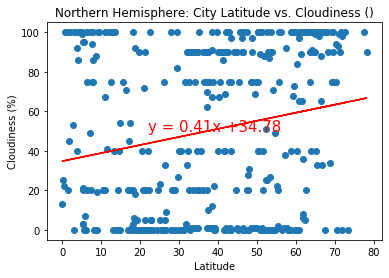

The r-squared is:0.200102723173542, thus signifiyng there is a not a strong correlation between Latitude & Cloudiness


In [21]:
cloudinessNorthern = [cloudiness for cloudiness in northernHemisphere['Cloudiness %']]

plt.scatter(latitudeNorthern, cloudinessNorthern)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, cloudinessNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(22,50), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15441339477054467


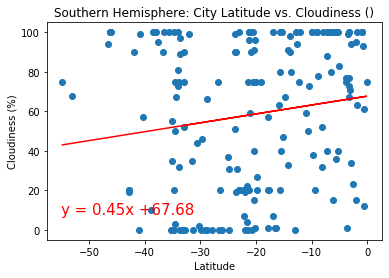

The r-squared is:0.15441339477054467, thus signifiyng there is a not a strong correlation between Latitude & Cloudiness


In [22]:
cloudinessSouthern = [cloudiness for cloudiness in southernHemisphere['Cloudiness %']]

plt.scatter(latitudeSouthern, cloudinessSouthern)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, cloudinessSouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-55,8), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.26864973905796213


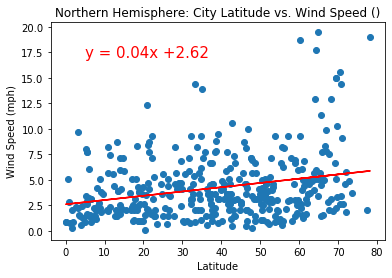

The r-squared is:0.26864973905796213, thus signifiyng there is a not a strong correlation between Latitude & Wind Speeed. Most cities wind speed is below 10mph. The wind speeds do tend to be higher in the Northern vs. the Southern Hemisphere.


In [23]:
windNorthern = [wind for wind in northernHemisphere['Wind Speed']]

plt.scatter(latitudeNorthern, windNorthern)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, windNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(5,17), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Wind Speeed. Most cities wind speed is below 10mph. The wind speeds do tend to be higher in the Northern vs. the Southern Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.47764183501372187


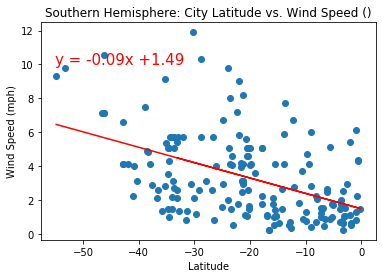

The r-squared is:-0.47764183501372187, thus signifiyng there is a not a strong correlation between Latitude & Wind Speeed. Most cities wind speed is below 6mph.


In [24]:
windSouthern = [wind for wind in southernHemisphere['Wind Speed']]

plt.scatter(latitudeSouthern, windSouthern)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, windSouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-55,10), fontsize=15, color='red')
plt.show()
print(f"The r-squared is:{rvalue}, thus signifiyng there is a not a strong correlation between Latitude & Wind Speeed. Most cities wind speed is below 6mph.")